<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 3*

# 📝 Assignment
---

# 🌱 **기본 과제**

이번에는 노트에서 다루지 않은 새로운 데이터인 [Melbourne Housing Market](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market#:~:text=calendar_view_week-,MELBOURNE_HOUSE_PRICES_LESS,-.csv)을 사용하여 정규화를 연습해 보겠습니다.

## **Part 1. Preprocessing**

### **1-1. 데이터 전처리**

- 데이터셋을 불러온 후 전처리를 수행합니다.
  - 모델링을 하기 전에 아래 항목을 drop 해주세요.
    - 특성
      - 날짜 특성
      - 범주형 데이터 중에서 카디널리티가 50이 넘는 특성
    - 행
      - Price 변수 기준 결측치 행
      - 중복되는 행

#### **Q1. 전처리 후 데이터의 shape을 제출하세요.**

In [1]:
import pandas as pd

# get data
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/melbourne_house_prices/MELBOURNE_HOUSE_PRICES_LESS.csv')

# drop high cardinality cols
df.drop(columns=['Suburb','Address','SellerG','Date'], inplace=True)

# drop na values in Price
df.dropna(subset=['Price'], inplace=True)

# drop duplicated rows
df.drop_duplicates(inplace=True)

In [2]:
# 데이터셋 확인 (rows, columns)
print(df.shape)
df.head()

(42515, 9)


,Rooms,Type,Price,Method,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,3,h,1490000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,3,h,1220000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,3,h,1420000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,3,h,1515000.0,S,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,2,h,670000.0,S,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


### **1-2. OneHotEncoder**
- 데이터 분리
  - 이전 과제와 동일하게 데이터를 훈련/검증/테스트 세트로 나누어 주세요.
    - 타겟 특성을 확인하고 타겟 변수를 나누어 줍니다.
  - `train_test_split()`을 사용하여 전체 데이터를 훈련과 테스트 데이터로 나누어 주세요. 
    - 훈련과 테스트 데이터는 8:2의 비로 나눕니다.
    - `random_state=2`로 설정합니다. 
  - `train_test_split()`을 사용하여 훈련 데이터를 훈련과 검증 데이터로 나누어 주세요.
    - 훈련과 검증 데이터는 8:2의 비로 나눕니다.
    - `random_state=2`로 설정합니다.
- OneHotEncoder
  - `category_encoders` 라이브러리를 사용해서 원핫인코딩을 수행하세요.

In [3]:
# 피쳐와 타겟을 분리
X = df.drop(columns='Price')
y = df['Price']

In [4]:
# 데이터셋 분리 - train 80%, test 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=2)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(27209, 8) (6803, 8) (8503, 8)
(27209,) (6803,) (8503,)


##### **Q2. 훈련/검증/테스트 데이터에 원핫인코딩을 수행하고 열(column) 개수를 제출하세요.**

In [5]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.2 MB/s 


In [6]:
# OneHotEncoder
from category_encoders import OneHotEncoder

# categorical -> onehot encoding
encoder = OneHotEncoder(use_cat_names = True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded  = encoder.transform(X_val)
X_test_encoded  = encoder.transform(X_test)

print(X_train_encoded.shape, X_val_encoded.shape)
X_train_encoded.shape[1]

(27209, 54) (6803, 54)


54

## **Part 2. 정규화 모델**

- 여러 회귀 모델을 만들어서 비교해보세요.
  - 모델을 수행하기 전에 **`baseline`**모델을 만들어주세요.
  - 정규화 모델을 학습하기 전에 **`StandardScaler`**를 사용해서 **표준화**를 수행해주세요.
  - **`ols`**, **`ridge`**, **`lasso`** 회귀모델을 아래와 같은 조건에서 만들고 각각의 회귀계수를 확인해보세요.
    - `LinearRegression()`
    - `Ridge(alpha=1)`
    - `Lasso(alpha=1000, tol=1)`

In [7]:
from sklearn.metrics import mean_absolute_error, r2_score

# 기준모델
target = 'Price'
predict = y_train.mean()
y_base = [predict] * len(y_train)

mae = mean_absolute_error(y_train, y_base)
r2 = r2_score(y_train, y_base)
print("기준모델 mae:", "{0:.2f}".format(mae))
print("기준모델 R2:", "{0:.2f}".format(r2))

기준모델 mae: 420382.31
기준모델 R2: 0.00


In [8]:
# 정규화 모델 사용에 앞서 StandardScaler 사용
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [9]:
# plot coefficients
import matplotlib.pyplot as plt
import numpy as np

def coef_visual(model):
  coefficients = pd.Series(model.coef_.tolist(), X_train_encoded.columns)
  idx = np.abs(coefficients).head(40).index
  plt.figure(figsize=(6, 8))
  coefficients[idx].sort_values().plot.barh()
  plt.title(str(model))
  plt.show()

0.27245773698344633
0.150914907615759


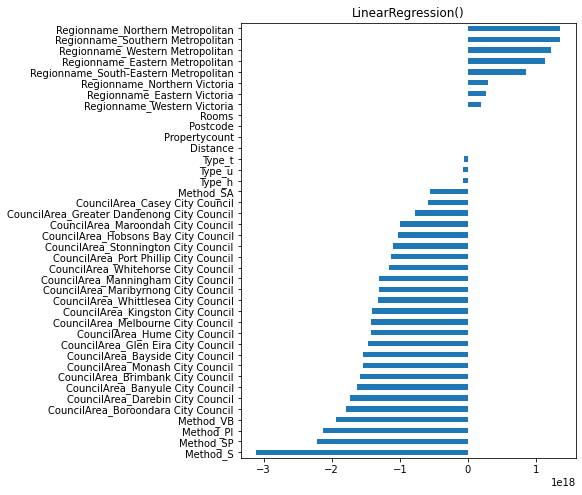

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# OLS: Multiple Linear Regression

ols = LinearRegression()
ols.fit(X_train_scaled, y_train)

y_train_pred_ols = ols.predict(X_train_scaled)
y_val_pred_ols = ols.predict(X_val_scaled)

print(r2_score(y_train_pred_ols, y_train))
print(r2_score(y_val_pred_ols, y_val))
coef_visual(ols)

### **2-1. Ridge Regression**

###### **Q3. Ridge 회귀모델의 회귀계수 중 ``절대값이 가장 작은 특성``의 이름과 회귀계수를 ``Abc, 123.45``의 형식으로 제출하세요. (소수점 아래 2자리까지)**

0.27410255482043355
0.15288171705973141


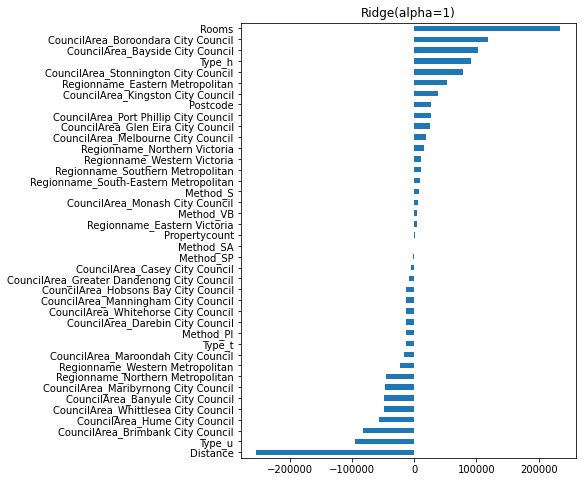

In [11]:
# Ridge Regression
ridge = Ridge(alpha=1)
ridge.fit(X_train_scaled, y_train)

y_train_pred_ridge = ridge.predict(X_train_scaled)
y_val_pred_ridge = ridge.predict(X_val_scaled)

print(r2_score(y_train_pred_ridge, y_train))
print(r2_score(y_val_pred_ridge, y_val))
coef_visual(ridge)

In [12]:
# L2-norm으로 인해 영향력이 가장 낮은 특성
ridge_coef = pd.Series(ridge.coef_.tolist(), X_train_encoded.columns)
# [(round(x, 2), y) for x, y in zip(ridge_coef, ridge_coef.index) if abs(x) == min(abs(ridge_coef))][0]

for x, y in zip(ridge_coef, ridge_coef.index):
  if abs(x) == min(abs(ridge_coef)):
    print(round(x, 2), y)

560.62 CouncilArea_Moorabool Shire Council


### **2-2. Lasso Regression**

###### **Q4. Lasso 회귀모델의 회귀계수 중 0으로 수렴한 특성의 개수를 제출하세요.**

0.265817245072993
0.15287406497586065


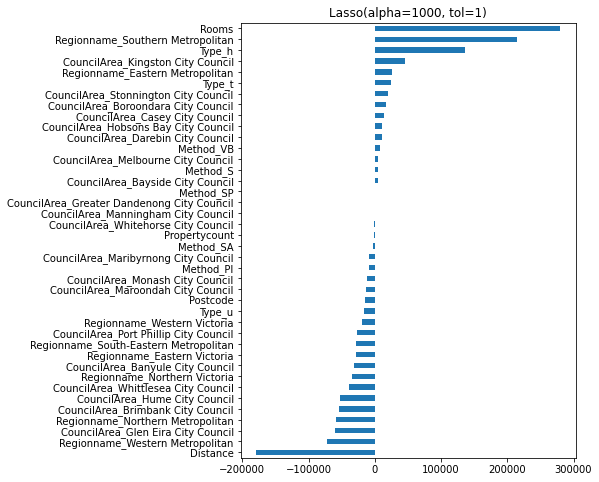

In [13]:
lasso = Lasso(alpha=1000, tol=1)
lasso.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_val_pred_lasso = lasso.predict(X_val_scaled)

print(r2_score(y_train_pred_lasso, y_train))
print(r2_score(y_val_pred_lasso, y_val))

coef_visual(lasso)

In [14]:
# L1-norm으로 인해 영향력이 사라진 특성들
lasso_coef = pd.Series(lasso.coef_.tolist(), X_train_encoded.columns)
[(x, y) for x, y in zip(lasso_coef, lasso_coef.index) if x == 0]

[(-0.0, 'CouncilArea_Greater Dandenong City Council'),
 (-0.0, 'CouncilArea_Manningham City Council'),
 (-0.0, 'CouncilArea_Moreland City Council')]

### **2-3. 일반화 성능 검증**
-  학습한 정규화 모델 중 검증 세트의 **`MAE`**가 가장 낮은 모델을 선택하고 일반화 성능을 확인하세요.
  -  일반화 성능은 **`Test Set`**를 한 번만 사용해서 확인합니다.
  - 일반화 성능 확인 시 평가지표는 **`MAE`**를 사용해주세요.

###### **Q5. 정규화 모델 중 검증 세트의 MAE가 가장 낮은 모델로 일반화 성능을 확인하고 점수를 제출해주세요. (평가지표는 MAE사용)** 

In [15]:
# val score 비교
ridge_val_score = mean_absolute_error(y_val_pred_ridge, y_val)
lasso_val_score = mean_absolute_error(y_val_pred_lasso, y_val)

ridge_val_score < lasso_val_score

True

In [16]:
# test score
y_pred_ridge = ridge.predict(X_test_scaled)
print("Test MAE:","{0:.2f}".format(mean_absolute_error(y_pred_ridge, y_test)))

Test MAE: 255111.92


# 🥇 **도전 과제**

- RidgeCV와 LassoCV를 사용해서 최적의 알파값을 찾는 과정을 수행하고 성능을 개선해보세요.

- ElasticNet 정규화 모델에 대해서 추가로 학습해보세요. 

- Lasso 와 Ridge에 사용되는 L1, L2 정규화에 대해 알아보고 논의해보세요.
